# 🌳 Experiment 3: Decision Tree Classification

Date: *10/02/2026*


---




## Aim
To classify video games into High Sales and Low Sales using Decision Tree.


## Theory
Decision Tree is a supervised classification algorithm.

It splits data based on feature importance.

It is easy to understand and visualize.


## Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Upload Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("vgsales.csv")


Saving vgsales.csv to vgsales (3).csv


In [ ]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Checking Missing Values


In [ ]:
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Handling Missing Values


In [ ]:
df = df.dropna()


## Creating Target Class


In [ ]:
median_sales = df['Global_Sales'].median()

df['Sales_Class'] = df['Global_Sales'].apply(
    lambda x: "High" if x >= median_sales else "Low"
)


## Feature Selection


In [ ]:
X = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
y = df['Sales_Class']


## Splitting Dataset


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## Training Decision Tree Model


In [ ]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4)

## Prediction


In [ ]:
y_pred = dt.predict(X_test)


## Model Evaluation


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9682896890343698
              precision    recall  f1-score   support

        High       0.98      0.96      0.97      2498
         Low       0.96      0.98      0.97      2390

    accuracy                           0.97      4888
   macro avg       0.97      0.97      0.97      4888
weighted avg       0.97      0.97      0.97      4888



## Confusion Matrix


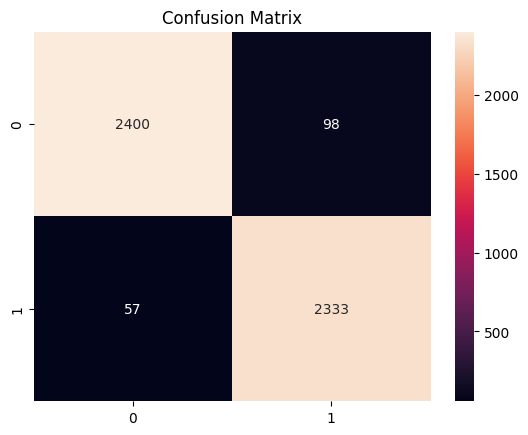

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


## Decision Tree Visualization


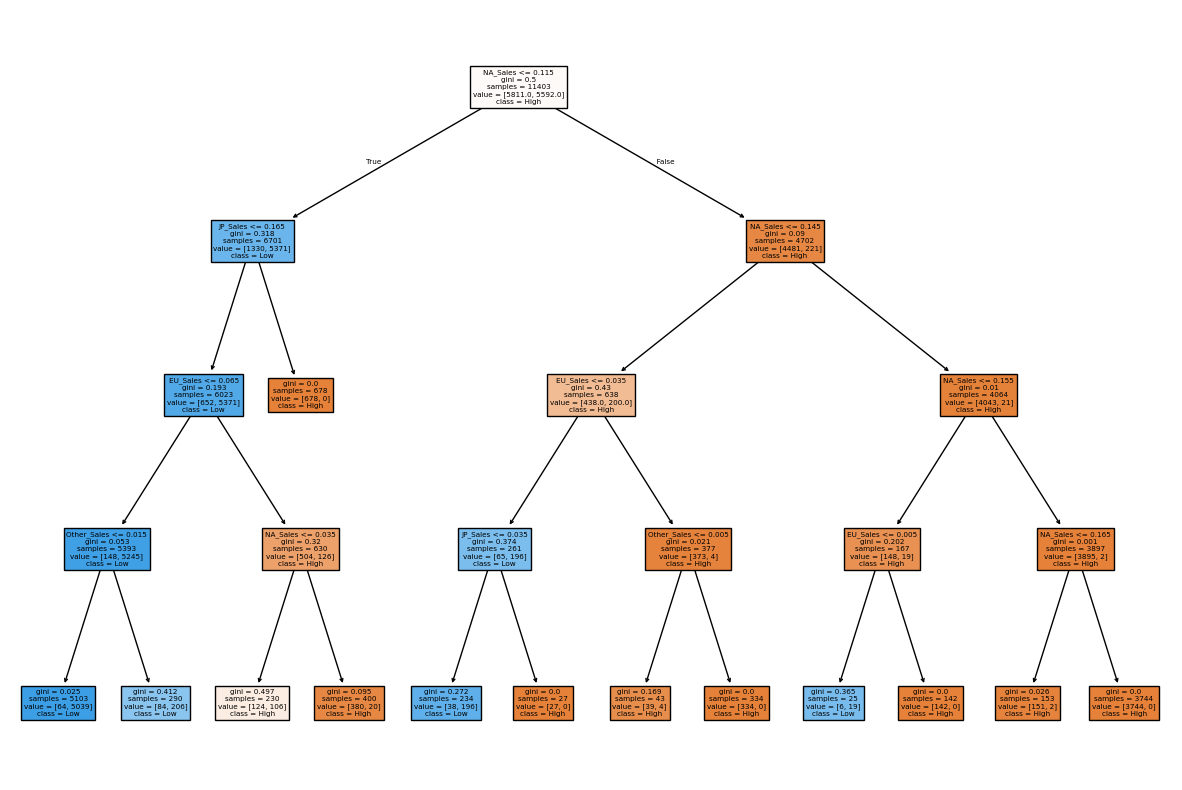

In [ ]:
plt.figure(figsize=(15,10))

plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["High","Low"],
    filled=True
)

plt.show()


## Result
The Decision Tree model classified video games into High and Low sales categories successfully.


## Conclusion
Decision Trees are useful for classification and easy to interpret.
